## IMPORTING LIBERARIES 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Exploring the Data Set

In [2]:
raw_data = pd.read_csv('https://gist.githubusercontent.com/omairaasim/7845d01b0c2a777cc0cf2885ab499794/raw/9d87e438603954eb54bef60039dcd710ff27c2b4/project_1_dataset.csv')

In [3]:
raw_data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# We have two variables only.
# We treat YearsExperience as (Input)Feature and Salary as (output)Predictor

# Preprocessing

### Exploring the descriptive statistics of the variables and its information

In [5]:
raw_data.describe(include="all")

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
# Smaller data set right !! We found no missing values there.
# Now we can proceed for further steps

### Exploring Probablity Distribution Function

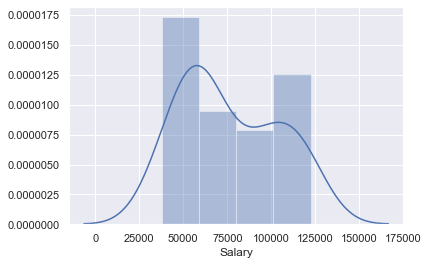

In [8]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(raw_data['Salary'])

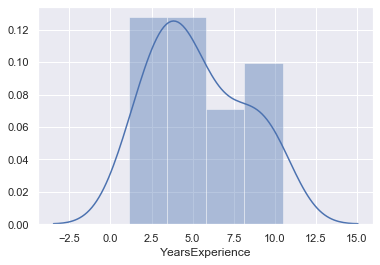

In [9]:
sns.distplot(raw_data['YearsExperience'])

In [10]:
# Seems like no outliers, Great !! :D

# SIMPLE LINEAR REGRESSION MODEL

### Declare the inputs and the targets¶

In [11]:
# The target(s) (dependent variable) is 'Salary'
targets = raw_data['Salary']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = raw_data.drop(['Salary'],axis=1)

### Scaling Inputs

In [12]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [14]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Creating Regression

In [15]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)


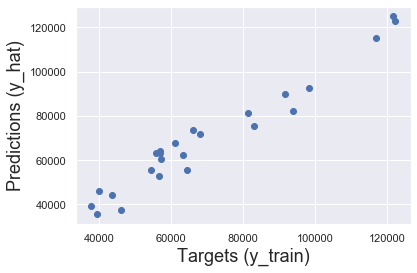

In [17]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

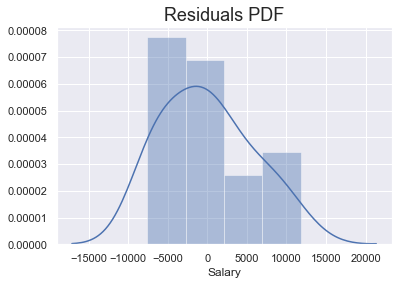

In [18]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

## TESTING

In [19]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

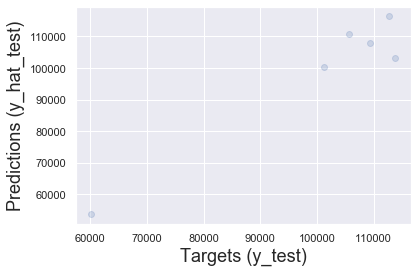

In [20]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [21]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head(10)

,Prediction
0,116309.664908
1,100174.812027
2,53668.471369
3,110615.010950
4,107767.683971
5,103022.139006


In [22]:
y_test1 = y_test.reset_index(drop=True)
df_pf['Target'] = y_test1
df_pf


,Prediction,Target
0,116309.664908,112635.0
1,100174.812027,101302.0
2,53668.471369,60150.0
3,110615.010950,105582.0
4,107767.683971,109431.0
5,103022.139006,113812.0


In [23]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [24]:
df_pf

,Prediction,Target,Residual
0,116309.664908,112635.0,-3674.664908
1,100174.812027,101302.0,1127.187973
2,53668.471369,60150.0,6481.528631
3,110615.010950,105582.0,-5033.010950
4,107767.683971,109431.0,1663.316029
5,103022.139006,113812.0,10789.860994


In [25]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,116309.664908,112635.0,-3674.664908,3.262454
1,100174.812027,101302.0,1127.187973,1.112701
2,53668.471369,60150.0,6481.528631,10.775609
3,110615.010950,105582.0,-5033.010950,4.766921
4,107767.683971,109431.0,1663.316029,1.519968
5,103022.139006,113812.0,10789.860994,9.480425


In [26]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,6.000000,6.000000,6.000000,6.000000
mean,98592.963705,100485.333333,1892.369628,5.153013
std,22728.468769,20291.976086,5996.940406,4.088679
min,53668.471369,60150.000000,-5033.010950,1.112701
25%,100886.643772,102372.000000,-2474.201688,1.955589
50%,105394.911488,107506.500000,1395.252001,4.014688
75%,109903.179205,111834.000000,5276.975480,8.302049
max,116309.664908,113812.000000,10789.860994,10.775609


In [27]:
# Sometimes it is useful to check these outputs manually
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1,100174.81,101302.00,1127.19,1.11
4,107767.68,109431.00,1663.32,1.52
0,116309.66,112635.00,-3674.66,3.26
3,110615.01,105582.00,-5033.01,4.77
5,103022.14,113812.00,10789.86,9.48
2,53668.47,60150.00,6481.53,10.78


In [28]:
df_pf.reset_index(drop=True)

,Prediction,Target,Residual,Difference%
0,116309.66,112635.00,-3674.66,3.26
1,100174.81,101302.00,1127.19,1.11
2,53668.47,60150.00,6481.53,10.78
3,110615.01,105582.00,-5033.01,4.77
4,107767.68,109431.00,1663.32,1.52
5,103022.14,113812.00,10789.86,9.48


In [36]:
# JUST FOR TESTING MANUALLY:  PRIDICTING VALUES USING OUR MODEL WHICH BASED ON NUMBER OF EXPERIENCE

myinput = np.array([3.2])
myinput2 = myinput.reshape(-1,1)
inputs_scaled = scaler.transform(myinput2)

reg.predict(inputs_scaled)


array([55566.68935542])